# Machine Learning for Classification
# Churn prediction project
In this project, we will use the Bank Marketing dataset

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

In [28]:
# Download and load the dataset
# Download and unzip the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip bank.zip

--2024-10-15 17:34:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank.zip’

bank.zip                [  <=>               ] 565.47K  1.79MB/s    in 0.3s    

2024-10-15 17:34:50 (1.79 MB/s) - ‘bank.zip’ saved [579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [29]:
# Now, read the 'bank-full.csv' file
df = pd.read_csv('bank-full.csv', sep=';')
# Check if the data is loaded correctly
print(df.head())

In [31]:
# Select only the required features
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
           'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns]

In [32]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [33]:
# Question 1: Most frequent observation (mode) for the column education?
print("\nMost frequent education level:", df['education'].mode()[0])


Most frequent education level: secondary


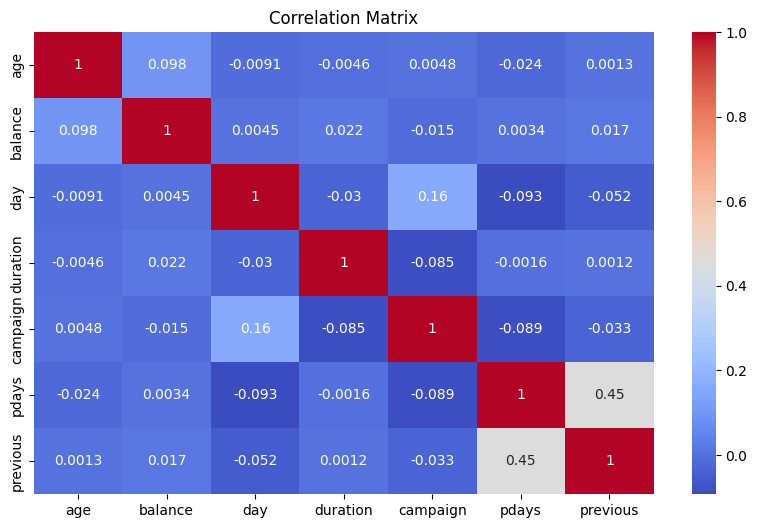

In [34]:
# Question 2: Create correlation matrix for numerical features
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Biggest correlation pair
print("\nBiggest correlation pair:", corr_matrix.unstack().sort_values(ascending=False)[7:9])


Biggest correlation pair: previous  pdays       0.45482
pdays     previous    0.45482
dtype: float64


In [36]:
# Target encoding: Replace 'y' column values with 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [37]:
# Split the data into train/val/test sets (60%/20%/20%)
X = df.drop('y', axis=1)
y = df['y']

In [38]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'housing',
                               'contact', 'month', 'poutcome'], drop_first=True)

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [41]:
# Check the column names
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')


In [46]:
# Question 3: Mutual Information score for categorical variables
# Remove any leading/trailing spaces from column names
X_train.columns = X_train.columns.str.strip()

# Get all one-hot encoded columns derived from the original categorical features
categorical_vars = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
encoded_categorical_vars = [col for col in X_train.columns
                            if any(cat_var in col for cat_var in categorical_vars)]
# Select the one-hot encoded columns
X_train_cat = X_train[encoded_categorical_vars]

mi_scores = mutual_info_classif(X_train_cat, y_train, discrete_features=True)
mi_scores_rounded = [round(score, 2) for score in mi_scores]

print("\nMutual Information scores:", dict(zip(encoded_categorical_vars, mi_scores_rounded)))
print("Highest MI score variable:", encoded_categorical_vars[np.argmax(mi_scores)])


Mutual Information scores: {'job_blue-collar': 0.0, 'job_entrepreneur': 0.0, 'job_housemaid': 0.0, 'job_management': 0.0, 'job_retired': 0.0, 'job_self-employed': 0.0, 'job_services': 0.0, 'job_student': 0.0, 'job_technician': 0.0, 'job_unemployed': 0.0, 'job_unknown': 0.0, 'marital_married': 0.0, 'marital_single': 0.0, 'education_secondary': 0.0, 'education_tertiary': 0.0, 'education_unknown': 0.0, 'housing_yes': 0.01, 'contact_telephone': 0.0, 'contact_unknown': 0.01, 'month_aug': 0.0, 'month_dec': 0.0, 'month_feb': 0.0, 'month_jan': 0.0, 'month_jul': 0.0, 'month_jun': 0.0, 'month_mar': 0.0, 'month_may': 0.01, 'month_nov': 0.0, 'month_oct': 0.01, 'month_sep': 0.0, 'poutcome_other': 0.0, 'poutcome_success': 0.03, 'poutcome_unknown': 0.01}
Highest MI score variable: poutcome_success


In [42]:
# Question 4: Logistic Regression (one-hot encoded variables)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Calculate accuracy on validation dataset
y_pred_val = model.predict(X_val)
accuracy_val = round(accuracy_score(y_val, y_pred_val), 2)
print("\nValidation accuracy:", accuracy_val)


Validation accuracy: 0.9


In [43]:
# Question 5: Feature elimination - checking the impact of each feature
original_accuracy = accuracy_val
accuracy_differences = {}

for col in X_train.columns:
    X_train_drop = X_train.drop(col, axis=1)
    X_val_drop = X_val.drop(col, axis=1)

    model.fit(X_train_drop, y_train)
    y_pred_drop = model.predict(X_val_drop)
    acc_drop = round(accuracy_score(y_val, y_pred_drop), 2)

    accuracy_differences[col] = original_accuracy - acc_drop

least_impactful_feature = min(accuracy_differences, key=accuracy_differences.get)
print("\nFeature with smallest difference in accuracy:", least_impactful_feature)


Feature with smallest difference in accuracy: age


In [44]:
# Question 6: Regularized Logistic Regression with different C values
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = {}

for c in C_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    acc = round(accuracy_score(y_val, y_pred_val), 3)
    accuracies[c] = acc

best_C = max(accuracies, key=accuracies.get)
print("\nBest C value for validation accuracy:", best_C)



Best C value for validation accuracy: 0.1
